<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Machine-Learning/blob/master/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Polynomial Kernel SVM in 3D Feature Space**
-------------------------------
You have seen how a polynomial kernel of degree 2 can map the original 2D data
$$(x_1, x_2)$$
to a 3D feature space via some transformation
$$
\phi(\mathbf{x}).
$$
You also saw that **the decision boundary** in the 3D space—expected to be a hyperplane—**appears** as a circular surface when visualized.

## **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

## **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code to visualise and create plots.
   - Include a discussion (in markdown cells) illustrating the geometry behind the mapping
     $$\phi(\mathbf{x})$$
     and the resulting decision boundary.
   - Use
     `$` symbol to delimit inline equations and `$$` to delimit full-line equations.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




# Kernel Ridge Regression and Kernel Logistic Regression
----------------------------------------

## SVM Primal Loss: Hinge Loss + Penalty Reformulation

Recall the **primal form** of the **Soft-Margin SVM** optimization problem:

$$
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

subject to:

$$
y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i
$$

Here:
- **$ \xi_i $**: Slack variables allowing for misclassifications.
- **$ C $**: Regularization parameter balancing margin size and misclassification penalty.

We embed the constraints into the objective using the **positive part operator** $ [x]_+ = \max(0, x)$ and express $C$ as the inverse of the regularization parameter $\lambda$, $C = \frac{1}{\lambda}$.


Substituting this into the primal loss gives the equivalent optimization problem:

$$
\min_{w, b} \frac{\lambda}{2} \|w\|^2 + \sum_{i=1}^{n} [1 - y_i (w^T x_i + b)]_+
$$

### Interpreting the Terms

1. **Penalty Term (Regularization):**

   $$
   \frac{\lambda}{2} \|w\|^2
   $$

   This term penalizes large weights, effectively controlling the **margin width**. A smaller $\lambda$ leads to less regularization (allowing more flexibility), while a larger $\lambda$ forces the model to maximize the margin more aggressively.

2. **Hinge Loss Term:**

   $$
   \sum_{i=1}^{n} [1 - y_i f(x_i)]_+
   $$




### Understanding the Hinge Loss

- If a data point is **correctly classified** and lies **outside the margin** ($ y_i f(x_i) \geq 1 $), the hinge loss is zero:

$$
[1 - y_i f(x_i)]_+ = 0
$$

- If a data point lies **inside the margin** ($ y_i f(x_i) < 1 $) or is **misclassified** ($ y_i f(x_i) < 0 $), the loss is proportional to its distance from the margin.




## Substituting Hinge Loss with Other Loss Functions

While SVM uses the **hinge loss** for classification, other loss functions can be substituted, leading to different model behaviors.






1. **Squared Error Loss**

  Common in **regression tasks** and **Kernel Ridge Regression**:

  $$
  L_{\text{square}}(y_i, f(x_i)) = (y_i - f(x_i))^2
  $$

  When the **hinge loss** is replaced with **squared error loss** and combined with the **kernel trick**, the model transitions into **Kernel Ridge Regression**.

  This changes the focus from **classification** to **function approximation**, allowing for more flexible decision boundaries adapted to regression tasks.

2. **Binomial Log Loss (Logistic Loss)**

  Used in **logistic regression**, this loss is smooth and differentiable:

  $$
  L_{\text{log}}(y_i, f(x_i)) = \log(1 + \exp(-y_i f(x_i)))
  $$

  While replacing the hinge loss with squared error loss leads to Kernel Ridge Regression (suitable for regression tasks), replacing the hinge loss with the **logistic loss** results in a probabilistic classifier known as **Kernel Logistic Regression**.

## Comparing Linear Ridge Regression and Kernel Ridge Regression

In this analysis, we aim to compare the performance of **Linear Ridge Regression** and **Kernel Ridge Regression (KRR)**, with a focus on the impact of using **Radial Basis Function (RBF) kernels**. While **Linear Ridge Regression** fits a simple linear relationship between features and the target variable, **Kernel Ridge Regression** leverages the **kernel trick** to model complex, non-linear patterns without explicitly transforming the feature space.

For this comparison, we will use a **synthetic sinusoidal dataset**, designed to highlight the differences between linear and non-linear modeling approaches. The dataset consists of data points sampled from a **sine wave** with added **Gaussian noise**. This creates a non-linear regression problem that linear models struggle to capture accurately.



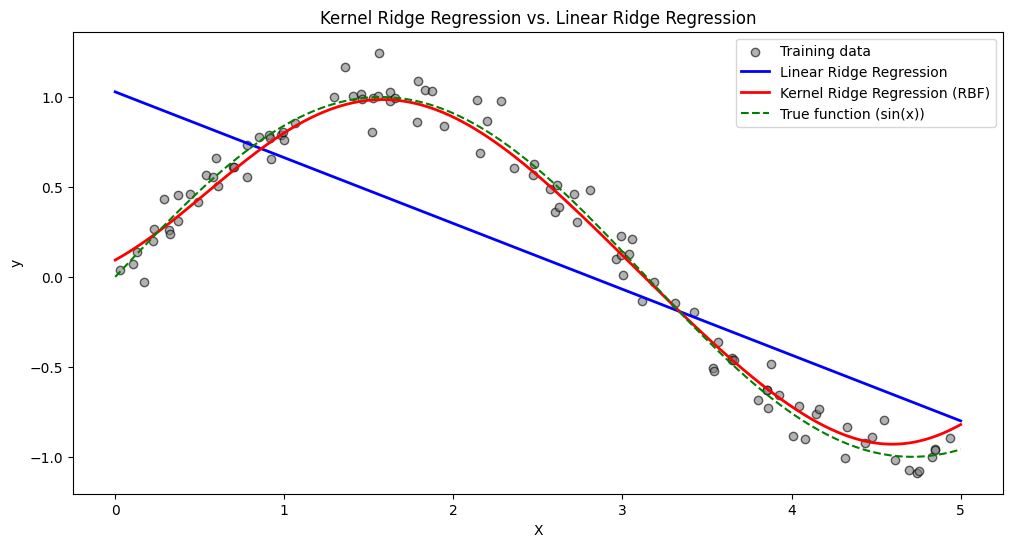

Linear Ridge Regression MSE: 0.188
Kernel Ridge Regression MSE: 0.009


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 1. Generate Non-Linear Data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # Random X values between 0 and 5
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Non-linear sine wave with noise

# Create dense grid for plotting predictions
X_plot = np.linspace(0, 5, 500).reshape(-1, 1)

# 2. Train Linear Ridge Regression (Baseline)
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
y_ridge = ridge.predict(X_plot)

# 3. Train Kernel Ridge Regression with RBF Kernel
krr = KernelRidge(kernel='rbf', alpha=1.0)  # Gamma non-specified, i.e. data-adjusted. Higher gamma captures finer details
krr.fit(X, y)
y_krr = krr.predict(X_plot)

# 4. Plot Results
plt.figure(figsize=(12, 6))

# Original data
plt.scatter(X, y, color='gray', label='Training data', edgecolor='k', alpha=0.6)

# Linear Ridge Regression
plt.plot(X_plot, y_ridge, color='blue', linewidth=2, label='Linear Ridge Regression')

# Kernel Ridge Regression
plt.plot(X_plot, y_krr, color='red', linewidth=2, label='Kernel Ridge Regression (RBF)')

# Ground truth sine function (for reference)
plt.plot(X_plot, np.sin(X_plot), color='green', linestyle='--', label='True function (sin(x))')

# Plot formatting
plt.title('Kernel Ridge Regression vs. Linear Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# 5. Evaluate and Compare
ridge_mse = mean_squared_error(y, ridge.predict(X))
krr_mse = mean_squared_error(y, krr.predict(X))
print(f"Linear Ridge Regression MSE: {ridge_mse:.3f}")
print(f"Kernel Ridge Regression MSE: {krr_mse:.3f}")
